In [78]:
import pandas as pd #pandas library 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns


csvFile = pd.read_csv('Cell_Phones_meta.csv') #φόρτωση του Cell_Phones_meta.csv
jsonFile = pd.read_json('Cell_Phones_and_Accessories_5.json', lines=True) #φόρτωση του Cell_Phones_and_Accessories_5.json

csvFile.drop_duplicates() #αφαίρεση διπλοεγγραφών
jsonFile.drop_duplicates(subset=['reviewerID', 'asin'], inplace=True) #αφαίρεση διπλοεγγραφών

csvFile.dropna(axis=0) #αφαίρεση γραμμής που περιέχει τουλάχιστον μια κενή τιμή
jsonFile.dropna(axis=0) #αφαίρεση γραμμής που περιέχει τουλάχιστον μια κενή τιμή

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
638,4,True,"11 13, 2015",A24Y8B3MAD57SZ,B0000DIDAH,"{'Size:': ' Men's 46 mm', 'Color:': ' Black', ...",james avila,This a high quality band and it feels and look...,... high quality band and it feels and looks w...,1447372800,2,[https://images-na.ssl-images-amazon.com/image...
909,4,True,"12 23, 2016",A2K4Z2Q3ZSKQFB,B0002SYC5O,"{'Color:': ' White', 'Package Type:': ' Standa...",Alex Y. Yoon,I always care most about sound quality and sig...,Great sound quality and solidly built headphon...,1482451200,3,[https://images-na.ssl-images-amazon.com/image...
1307,5,True,"05 5, 2008",APY2KYDHD8QIZ,B0006TIA8Y,"{'Model:': ' 7-Port', 'Package Type:': ' Stand...",D. Bennethum,The one other reviewer was right on when they ...,Great LITTLE Hub!,1209945600,3,[https://images-na.ssl-images-amazon.com/image...
4797,5,True,"10 27, 2015",A21LX0AROD73W3,B000S5VI8A,"{'Size:': ' TZ900', 'Color:': ' Silver'}",Sam,I really love this device! It is super easy to...,Perfect for long road trips!,1445904000,9,[https://images-na.ssl-images-amazon.com/image...
5675,1,True,"03 28, 2012",A8KWF1MFW7AXQ,B000WKQ8LS,{'Color:': ' White'},Mr. Mike,I ordered 2 of this item and 2 of the&nbsp;<a ...,See pictures above!,1332892800,5,[https://images-na.ssl-images-amazon.com/image...
...,...,...,...,...,...,...,...,...,...,...,...,...
1126321,5,True,"06 11, 2016",A2CHYIOTH5NN5Y,B01FPJZ58M,{'Size:': ' White-17'},Farhan K,For my review of the Regetek 3- Port car charg...,Excellent Charger - Passed Every Test I Put It...,1465603200,2,[https://images-na.ssl-images-amazon.com/image...
1126322,5,False,"06 7, 2016",A3VE4IP1U4QBWO,B01FPJZ58M,{'Size:': ' White-17'},StatsPass,"The packaging was pretty generic, easy to open...","Small, Powerful and Exceptional Build Quality!",1465257600,2,[https://images-na.ssl-images-amazon.com/image...
1126613,5,True,"12 10, 2017",A3A4T9PJBMS23F,B01FWD1T3Q,{'Color:': ' cute doodle brown dogs and cats'},Em,Awesome case. I was concerned that this would ...,Great case,1512864000,3,[https://images-na.ssl-images-amazon.com/image...
1126836,5,False,"07 18, 2016",A2SFHFZHXAIWO6,B01G1RI5BQ,{'Color:': ' 6'},Danny G.,I have tried the LifeProof cases with the earl...,It works and well worth the price,1468800000,4,[https://images-na.ssl-images-amazon.com/image...


# A1

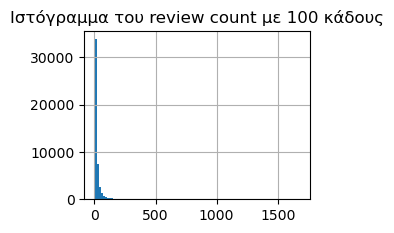

In [30]:
reviewCount = jsonFile['asin'].value_counts() #αποθήκευση του πλήθους εμφανίσεων της εγγραφης με συγκεκριμενο asin πεδίο
plt.subplot(2,2,1) #2x2 grid
reviewCount.hist(bins=100) #δημιουργία ιστογράμματος
plt.title('Ιστόγραμμα του review count με 100 κάδους') #τίτλος ιστογράμματος
plt.show() #εμφάνιση αποτελεσμάτων

# Α2

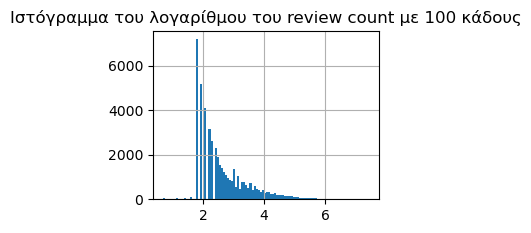

In [32]:
reviewCount = jsonFile['asin'].value_counts() #αποθήκευση του πλήθους εμφανίσεων της εγγραφης με συγκεκριμενο asin πεδίο
log_reviewCount = np.log1p(reviewCount) #υπολογισμός του λογαρίθμου της παραπάνω τιμής
plt.subplot(2,2,1) #2x2 grid
log_reviewCount.hist(bins=100) #δημιουργία ιστογράμματος
plt.title('Ιστόγραμμα του λογαρίθμου του review count με 100 κάδους') #τίτλος ιστογράμματος
plt.show() #εμφάνιση αποτελεσμάτων

# Α3

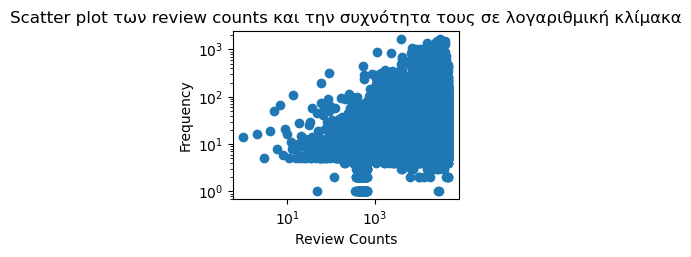

In [47]:
values = jsonFile['asin'].tolist() #μεταφορά δεδομ΄ένων του asin πεδίου σε λίστα values  
unique_values, counts = np.unique(values, return_counts=True) #υπολογισμών μοναδικών τιμών και τον αντίστοιχο αριθμό εμφάνισής τους σε πίνακα unique_values
plt.subplot(2,2,1) #2x2 grid
plt.scatter(unique_values,counts) #δημιουργία scatter plot με reviewcounts και frequency
plt.xscale('log') #λογαριθμική κλίμακα στον άξονα x
plt.yscale('log') #λογαριθμική κλίμακα στον άξονα y
plt.xlabel('Review Counts') #τίτλος για άξονα x
plt.ylabel('Frequency') #τίτλος για άξονα y
plt.title('Scatter plot των review counts και την συχνότητα τους σε λογαριθμική κλίμακα') #τίτλος για το scatter plot
plt.show() #εμφάνιση αποτελεσμάτων

# A4

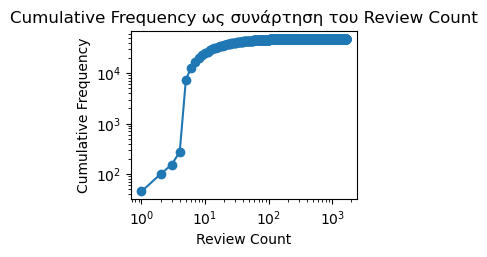

In [53]:
reviewCount = jsonFile['asin'].value_counts() #αποθήκευση του πλήθους εμφανίσεων της εγγραφης με συγκεκριμενο asin πεδίο
cumulative_frequency = np.cumsum(np.bincount(reviewCount)[1:]) #υπολογισμός του cumulative frequency vector
plt.subplot(2,2,1) #2x2 grid
plt.plot(np.arange(1,len(cumulative_frequency)+1),cumulative_frequency, marker='o') #δημιουργία γραφήματος 
plt.xscale('log') #λογαριθμική κλίμακα στον άξονα x
plt.yscale('log') #λογαριθμική κλίμακα στον άξονα y
plt.xlabel('Review Count') #τίτλος για άξονα x
plt.ylabel('Cumulative Frequency') #τίτλος για άξονα y
plt.title('Cumulative Frequency ως συνάρτηση του Review Count') #τίτλος για το plot
plt.show() #εμφάνιση αποτελεσμάτων

# A5

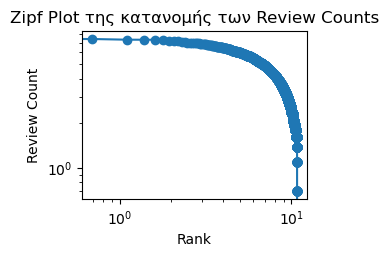

In [57]:
reviewCount = jsonFile['asin'].value_counts().values #αποθήκευση του πλήθους εμφανίσεων της εγγραφης με συγκεκριμενο asin πεδίο
rank = np.arange(1, len(reviewCount) + 1) #υπολογισμός του rank 
zipf_plot = np.sort(reviewCount)[::-1] #υπολογισμός του Zipf plot
plt.subplot(2,2,1) #2x2 grid
plt.plot(np.log(rank), np.log(zipf_plot), marker='o') #δημιουργία του plot 
plt.xscale('log') #λογαριθμική κλίμακα στον άξονα x
plt.yscale('log') #λογαριθμική κλίμακα στον άξονα y
plt.xlabel('Rank') #τίτλος για άξονα x
plt.ylabel('Review Count') #τίτλος για άξονα y
plt.title('Zipf Plot της κατανομής των Review Counts') #τίτλος για το plot
plt.show() #εμφάνιση αποτελεσμάτων

# Β

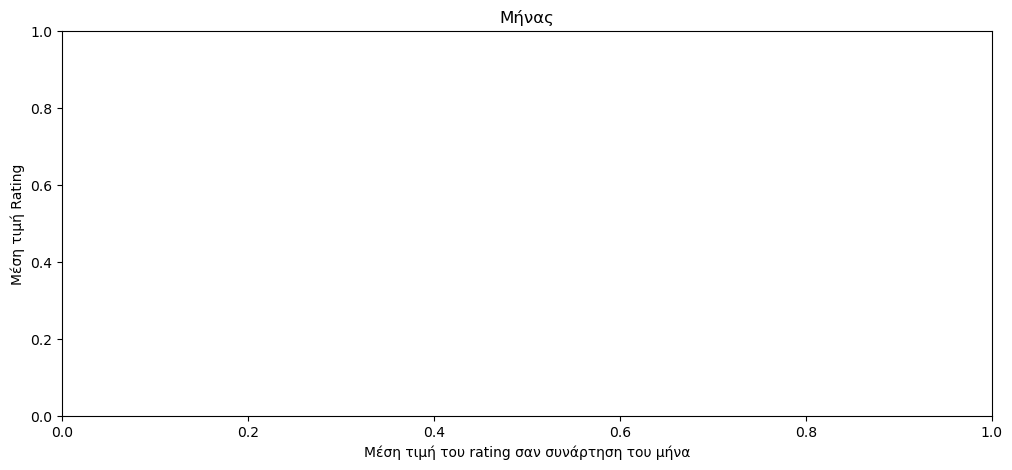

In [101]:
import seaborn as sns

jsonFile['reviewTime'] = pd.to_datetime(jsonFile['unixReviewTime'], unit='s') #μετατροπή unixtime πεδίο σε datetime object
first_reviews = jsonFile.groupby('asin')['reviewTime'].min() #εύρεση πρώτου review για κάθε προϊόν
first_reviews_month = first_reviews.dt.month #υπολογισμός μήνα πρώτου review

jsonFile['months_since_first_review'] = (jsonFile['reviewTime'].dt.year - first_reviews.dt.year) * 12 + (jsonFile['reviewTime'].dt.month - first_reviews_month)
monthly_avg_rating = jsonFile.groupby('months_since_first_review')['overall'].mean()

plt.figure(figsize=(12, 5))

ci = jsonFile.groupby('months_since_first_review')['overall'].sem() * 1.96  #υπολογισμός 95% confidence interval
ci = sns.lineplot(x=monthly_avg_rating.index, y=monthly_avg_rating, errorbar='sd') #δημιουργία γραφήματος

plt.xlabel('Μέση τιμή του rating σαν συνάρτηση του μήνα') #τίτλος για άξονα x
plt.ylabel('Μέση τιμή Rating') #τίτλος για άξονα y
plt.title('Μήνας') #τίτλος για το plot
plt.show() #εμφάνιση αποτελεσμάτων

# Γ

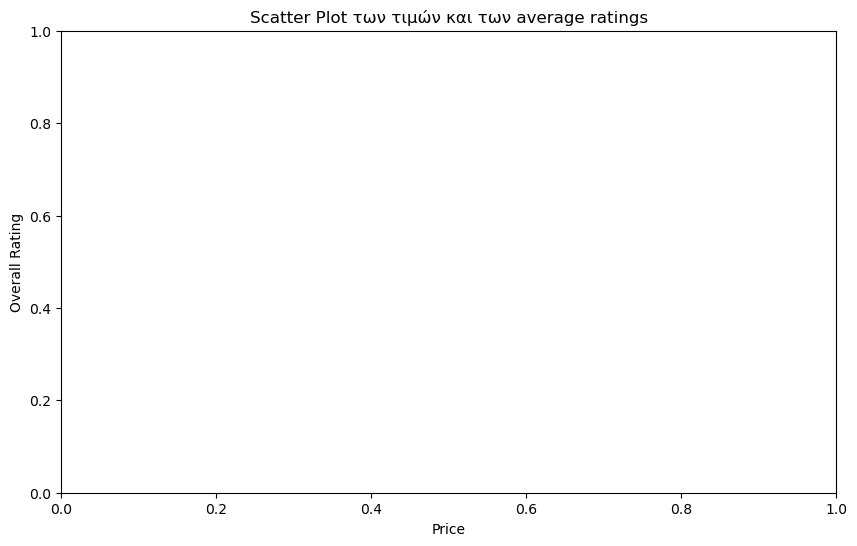

ValueError: x and y must have length at least 2.

In [117]:
from scipy.stats import pearsonr

joined_dataFrames = pd.merge(csvFile, jsonFile, on='asin', how='inner') #join τα δύο dataframes csv και json με βάση το κλειδί asin

#διαγραφή προιόντων που έχουν string στο πεδίο price
joined_dataFrames['price'] = pd.to_numeric(joined_dataFrames['price'], errors='coerce') 
joined_dataFrames = joined_dataFrames.dropna(subset=['price'])

joined_dataFrames['price'] = joined_dataFrames['price'].replace('[\$,]', '', regex=True).astype(float) #εξαγωγή πραγματικών τιμών από τη στήλη 'price'
unique_prices = joined_dataFrames.groupby('asin')['price'].mean() #υπολογισμός μέσου όρου τιμής (price) αν δυο προιόντα (δλδ με ίδιο asin) έχουν πολλ΄΄ές διαφορετικές τιμές
mean_ratings = joined_dataFrames.groupby('asin')['overall'].mean() #μέσο rating για κάθε asin 
filtered_products = mean_ratings[joined_dataFrames.groupby('asin')['overall'].count() >= 5] #αφαίρεση προιόντων με κάτω από 5 reviews
result = pd.merge(mean_ratings, unique_prices, on='asin', how='inner') #join τα 2 dataframes mean_ratings unique_prices με βάση το κλειδί asin


plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='overall', data=joined_dataFrames)
plt.title('Scatter Plot των τιμών και των average ratings')
plt.xlabel('Price')
plt.ylabel('Overall Rating')
plt.show()

non_null_data = joined_dataFrames[['price', 'overall']].dropna() #διαγραφή προιόντων με null τιμη
corr_coefficient, p_value = pearsonr(non_null_data['price'], non_null_data['overall']) #υπολογισμός Pearson Correlation Coefficient και p-value

print(f'Pearson Correlation Coefficient: {corr_coefficient}')
print(f'P-value: {p_value}')

#########################################################
#ίδια μεθοδολογία αλλά με λογάριθμο της τιμής

joined_dataFrames['log_price'] = np.log1p(joined_dataFrames['price'])

plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_price', y='overall', data=joined_dataFrames)
plt.title('Scatter Plot of Log(Price) vs Overall Rating')
plt.xlabel('Log(Price)')
plt.ylabel('Overall Rating')
plt.show()

#υπολογισμός Pearson Correlation Coefficient και p-value
corr_coefficient_log, p_value_log = pearsonr(joined_dataFrames['log_price'], joined_dataFrames['overall'])

print(f'Pearson Correlation Coefficient (Log Price): {corr_coefficient_log}')
print(f'P-value (Log Price): {p_value_log}')